In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from model import seq_classifier2
import matplotlib.pyplot as plt
from utils2 import vocab, batchgen
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('IMDB Dataset.csv')
Vocab = vocab(dataset)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:36<00:00, 1386.50it/s]


In [3]:
train_data, val_data = train_test_split(dataset, test_size=0.1, random_state=6103748)

In [4]:
model = seq_classifier2(embed_size=50, h_size=100, vocab=Vocab, pretrained_embeds=True)
cuda0 = torch.device('cuda:0')
model.cuda(device=cuda0)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [5]:
model.embeddings.weight.requires_grad

False

In [6]:
train_loss = []
train_t = []
val_loss = []
val_t = []

t=0; 
n_epochs = 5
for i in range(n_epochs):
    train_batches = batchgen(train_data, batchsize=100, vocab=Vocab)
    for x, lens, y in train_batches:
        y_pred = model.forward(x, lens)
        optimizer.zero_grad()
        loss = loss_fn(y_pred, y)
        train_loss.append(loss.item())
        train_t.append(t)
        if t%20 == 0:
            print(t, np.mean(train_loss[-19:]))
        loss.backward()
        optimizer.step()
        t+=1
    
    loss=0
    n=0
    val_batches = batchgen(val_data, batchsize=100, vocab=Vocab)
    for x, lens, y in val_batches:
        y_pred = model.forward(x, lens)
        loss += loss_fn(y_pred, y).item()
        n += 1
    val_loss.append(loss/n)
    val_t.append(t)        

0 0.6933103203773499
20 0.6894591356578627
40 0.6762865687671461
60 0.6460200203092474
80 0.6350755064111007
100 0.6366600958924544
120 0.6638339726548446
140 0.6457195564320213
160 0.6162497997283936
180 0.5920945876523068
200 0.5679164732757368
220 0.5752458007712113
240 0.6310699676212511
260 0.5647577596338171
280 0.5216870668687319
300 0.5688434839248657
320 0.5859065871489676
340 0.5672970006340429
360 0.5811769146668283
380 0.6327285672488966
400 0.6375745691751179
420 0.5986948734835574
440 0.5787127959100824
460 0.561917886922234
480 0.5283235327193612
500 0.5839190985027113
520 0.5511839719195115
540 0.5448203478988848
560 0.5590511780036124
580 0.5480740274253645
600 0.5267550976652848
620 0.5822485779461107
640 0.5344167336037284
660 0.503386389268072
680 0.5039741443960291
700 0.540890601120497
720 0.6284782164975217
740 0.5939666126903734
760 0.5656139034973947
780 0.5350216595750106
800 0.5154873775808435
820 0.5294976218750602
840 0.5760126553083721
860 0.53021873925861

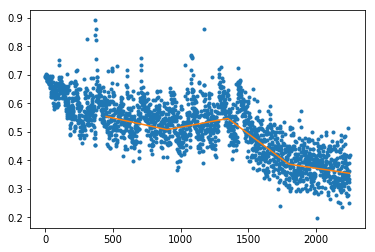

In [7]:
plt.plot(train_t, train_loss,'.')
plt.plot(val_t, val_loss,'-')

In [ ]:
loss=0
n=0
val_batches = batchgen(val_data, batchsize=100, vocab=Vocab)
for x, lens, y in val_batches:
    y_pred = model.forward(x, lens)
    loss += loss_fn(y_pred, y).item()
    n += 1
val_loss.append(loss/n)
val_t.append(t)

In [ ]:
loss/n

In [8]:
torch.save(model.state_dict(), './model_state_untrained_embeds')

In [ ]:
model.embeddings.weight.shape